# Exploratory book analysis

#### An important step when working with the NLTK package is making sure that all the modules, algorithms, corpora, lists are available when running the program/s.

In [1]:
#The following commands import the modules, algorithms, corpora, lists that will be needed for exploratory book analysis
import nltk #imports the nltk module
nltk.download("words") # downloads English words
nltk.download("stopwords") # downloads English stopwords 
from nltk.text import Text #imports the Text module that enables the exploratory search of the text
from nltk import bigrams # imports the bigrams module
from nltk.collocations import * # imports the collocations methods
import string # imports string module that allows running processs on strings
from string import punctuation # imports punctuation symbols
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2 # imports module for fetching and processing internet resources
import os #this module allows interfacing with the underlying operating system
import re #imports regular expression module 
from collections import OrderedDict #imports collections module, an alternative to list, dict, set, tuple
from nltk.draw import dispersion_plot
from IPython.display import display # a module that wraps the object to be displayed


[nltk_data] Downloading package words to /home/harish/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/harish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Opening up and reading the text of a book available on the Project Gutenberg web site

In [2]:
url = "/home/harish/Downloads/DHCS-workshop-notebooks/DHCS-workshop-notebooks/140-0.txt" #assigning a link to a variable
data = open(url).read() #opening up the link/file
print(len(data))
data = data.replace("\r\n", " ")
# data = unicode(data, errors="ignore") #ignores encoding errors
data[:10000]
#Alternatives:
# https://www.gutenberg.org/files/140/140-0.txt The Jungle by Upton Sinclair
#https://www.gutenberg.org/files/543/543-0.txt # Main Street by Sinclair Lewis
#https://www.gutenberg.org/files/1342/1342-0.txt Pride and Prejudice by Jane Austin

828919


'\ufeffThe Project Gutenberg EBook of The Jungle, by Upton Sinclair\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Jungle\n\nAuthor: Upton Sinclair\n\nRelease Date: March 11, 2006 [EBook #140]\nLast Updated: October 13, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE JUNGLE ***\n\n\n\n\nProduced by David Meltzer, Christy Phillips, Scott Coulter,\nLeroy Smith and David Widger\n\n\n\n\n\n\nTHE JUNGLE\n\nby Upton Sinclair\n\n\n(1906)\n\n\n\n\n\nChapter 1\n\n\nIt was four o’clock when the ceremony was over and the carriages began\nto arrive. There had been a crowd following all the way, owing to the\nexuberance of Marija Berczynskas. The occasion rested heavily upon\nMarija’s broad shoulders--it was her task to

#### Additional processing of the file, removing text metadata 

In [3]:
data = re.sub('^(.*?)START OF THIS PROJECT GUTENBERG EBOOK', '', data) # remove anything from the start of the string to the first occurence of Chapter 1

In [4]:
data[:10000]

'\ufeffThe Project Gutenberg EBook of The Jungle, by Upton Sinclair\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Jungle\n\nAuthor: Upton Sinclair\n\nRelease Date: March 11, 2006 [EBook #140]\nLast Updated: October 13, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE JUNGLE ***\n\n\n\n\nProduced by David Meltzer, Christy Phillips, Scott Coulter,\nLeroy Smith and David Widger\n\n\n\n\n\n\nTHE JUNGLE\n\nby Upton Sinclair\n\n\n(1906)\n\n\n\n\n\nChapter 1\n\n\nIt was four o’clock when the ceremony was over and the carriages began\nto arrive. There had been a crowd following all the way, owing to the\nexuberance of Marija Berczynskas. The occasion rested heavily upon\nMarija’s broad shoulders--it was her task to

In [5]:
len(data)
# data [:2000]

828919

In [6]:
len(data) # how long the entire string/file is (how many characters)?

828919

In [7]:
data[750000:] # checking the end of the file

'ke up a thing like that out of his head?”\n\nAnd then the hotel-keeper would go on to show how the Socialists had the\nonly real remedy for such evils, how they alone “meant business” with\nthe Beef Trust. And when, in answer to this, the victim would say that\nthe whole country was getting stirred up, that the newspapers were full\nof denunciations of it, and the government taking action against it,\nTommy Hinds had a knock-out blow all ready. “Yes,” he would say, “all\nthat is true--but what do you suppose is the reason for it? Are you\nfoolish enough to believe that it’s done for the public? There are\nother trusts in the country just as illegal and extortionate as the Beef\nTrust: there is the Coal Trust, that freezes the poor in winter--there\nis the Steel Trust, that doubles the price of every nail in your\nshoes--there is the Oil Trust, that keeps you from reading at night--and\nwhy do you suppose it is that all the fury of the press and the\ngovernment is directed against the 

#### Removing the Project Gutenberg declaration at the end of the book

In [8]:
data = re.sub('End of the Project Gutenberg(.*?)$', '', data) #removing the Project Gutenberg declaration at the end of the file

#### Now that the information that we don't consider to be the content of the book has been removed, we proceed with tokenizing the book into words

In [9]:
words_string = nltk.word_tokenize(data) # the entire text file is tokenized into individual words by using the nltk word_tokenize function

In [10]:
len(words_string) #checking the lenght of the word list created, how many words in the text?

180133

In [11]:
words_string[200:500] #checking the word list 

['hither',
 'and',
 'thither',
 ',',
 'bowling',
 'every',
 'one',
 'out',
 'of',
 'the',
 'way',
 ',',
 'and',
 'scolding',
 'and',
 'exhorting',
 'all',
 'day',
 'with',
 'her',
 'tremendous',
 'voice',
 ',',
 'Marija',
 'was',
 'too',
 'eager',
 'to',
 'see',
 'that',
 'others',
 'conformed',
 'to',
 'the',
 'proprieties',
 'to',
 'consider',
 'them',
 'herself',
 '.',
 'She',
 'had',
 'left',
 'the',
 'church',
 'last',
 'of',
 'all',
 ',',
 'and',
 ',',
 'desiring',
 'to',
 'arrive',
 'first',
 'at',
 'the',
 'hall',
 ',',
 'had',
 'issued',
 'orders',
 'to',
 'the',
 'coachman',
 'to',
 'drive',
 'faster',
 '.',
 'When',
 'that',
 'personage',
 'had',
 'developed',
 'a',
 'will',
 'of',
 'his',
 'own',
 'in',
 'the',
 'matter',
 ',',
 'Marija',
 'had',
 'flung',
 'up',
 'the',
 'window',
 'of',
 'the',
 'carriage',
 ',',
 'and',
 ',',
 'leaning',
 'out',
 ',',
 'proceeded',
 'to',
 'tell',
 'him',
 'her',
 'opinion',
 'of',
 'him',
 ',',
 'first',
 'in',
 'Lithuanian',
 ',',
 'wh

#### Removing stopwords from the text 

In [12]:
stopwords = set(nltk.corpus.stopwords.words('english')) # defines stopwords list to use (part of NLTK)

In [13]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

#### Extending the stopwords list

In [14]:
morewords =['--'] # adding more stopwords to the list of stopwords (this list can be further customized)
stopwords.update(morewords)

#### Removing words that are less than a character long

In [15]:
words_string = [word for word in words_string if len(word) > 1] # removes words that are less than a character long

#### Lowercasing all the words

In [16]:
words_string = [word.lower() for word in words_string] # lowercases all the words in the file

#### Removing stopwords from text

In [17]:
words_string = [word for word in words_string if word not in stopwords] # removes stopwords from the file

In [18]:
len(words_string) # notice a sharp decrease of the number of words after stopwords have been removed

70306

#### Book explorations: concordances and collocations

In [19]:
textList = Text(words_string) # creates a Text object based on the list of words from the text; this text object allows exploratory analysis of the text

In [20]:
type(textList) 

nltk.text.Text

In [21]:
textList[6050:8500] 

['form',
 'towering',
 'rest',
 'signaled',
 'colloquy',
 'followed',
 'brief',
 'point',
 'speak',
 'english',
 'lit-uanian.',
 'jurgis',
 'studied',
 'word',
 'carefully',
 'job',
 'je.',
 'nod',
 'worked',
 'stand.',
 'signals',
 'gesticulations',
 'part',
 'boss',
 'vigorous',
 'shakes',
 'head',
 'jurgis',
 'shovel',
 'guts',
 'stand.',
 'shakes',
 'head',
 'zarnos',
 'pagaiksztis',
 'szluofa',
 'imitative',
 'motions',
 'je.',
 'see',
 'door',
 'durys',
 'pointing',
 'je.',
 'to-morrow',
 'seven',
 'clock',
 'understand',
 'rytoj',
 'prieszpietys',
 'septyni',
 'dekui',
 'tamistai',
 'thank',
 'sir',
 'jurgis',
 'turned',
 'away',
 'sudden',
 'rush',
 'full',
 'realization',
 'triumph',
 'swept',
 'gave',
 'yell',
 'jump',
 'started',
 'run',
 'job',
 'job',
 'went',
 'way',
 'home',
 'upon',
 'wings',
 'burst',
 'house',
 'like',
 'cyclone',
 'rage',
 'numerous',
 'lodgers',
 'turned',
 'daily',
 'sleep',
 'meantime',
 'jokubas',
 'see',
 'friend',
 'policeman',
 'received',
 'e

### harish importantt

In [22]:
textList.concordance('chicago') # the text object allows us to examine concordances of different words in the text

Displaying 25 of 72 matches:
anation place rear room saloon part chicago known back yards. information defin
ania hard apply stockyards district chicago quarter million inhabitants still b
usic music home stretches arms give chicago saloons slums fade away green meado
old stories breaking men stockyards chicago happened afterward stories make fle
tation half hour second day arrival chicago beckoned one bosses proud made disp
stockyards jonas friend gotten rich chicago party bound knew one word chicago n
h chicago party bound knew one word chicago needed know least reached city tumb
istance unable realize arrived said chicago people longer pointed direction ins
gs things tied inside anywhere else chicago would stood good chance arrested po
ards biggest clubhouse biggest club chicago prizefights every cockfights even d
ll scully come aid bubbly creek arm chicago river forms southern boundary yards
eat industry endless horrors people chicago saw government inspectors packingto
ner later p

In [23]:
textList.similar('chicago', 20) # what are the words that appear in similar contexts to the word 'jurgis'? 

city world kansas responsible lithuania crowd women place seldom
moment


In [24]:
textIndex = nltk.text.ContextIndex(textList) # builds a textIndex object based on the textList

In [31]:
textIndex.word_similarity_dict('chicago')['kansas'] #how similar are 'carriage' and 'elizabeth'?

0.025

In [34]:
textIndex.common_contexts(['chicago', 'kansas']) # what are the common contexts for the words?

FreqDist({('come', 'city'): 2})

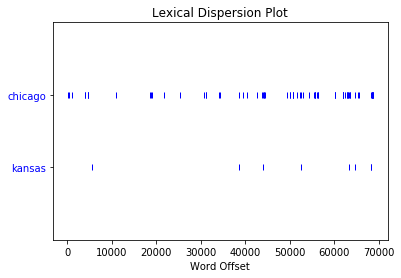

In [35]:
textList.dispersion_plot(['chicago', 'kansas']) #outputs a dispersion plot for words 'chicago' and 'packingtown'

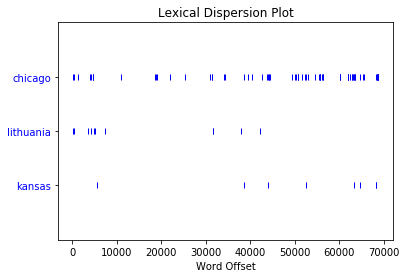

In [37]:
textList.dispersion_plot(['chicago', 'lithuania','kansas'])

#### Establishing collocations in the text

In [28]:
textList.collocations() # obtains collocations ("the habitual juxtaposition of a particular word with another word or words with a frequency greater than chance"; "a conventional way of saying things")

project gutenberg-tm; teta elzbieta; project gutenberg; united states;
guv ner; killing beds; grandmother majauszkiene; madame haupt; half
dozen; literary archive; gutenberg-tm electronic; packing houses;
master freddie; gutenberg literary; ashland avenue; electronic works;
hundred dollars; archive foundation; mike scully; could get


#### Exploring bigrams (a pair of consecutive written units, in our case words)

In [29]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # obtains bigram association measures

In [38]:
finder = BigramCollocationFinder.from_words(words_string, 5) # finds bigrams in the text
finder.apply_freq_filter(5) #removes bigrams that appear less than 5 times
bigrams = finder.nbest(bigram_measures.likelihood_ratio, 1000) #obtain the bigrams with the highest likelihood ratio
print('\n'.join('%s %s' % v for v in bigrams)) #printing them out

project gutenberg-tm
teta elzbieta
project gutenberg
united states
guv ner
killing beds
grandmother majauszkiene
madame haupt
gutenberg-tm electronic
hundred dollars
half dozen
electronic works
literary archive
gutenberg-tm works
ho ho
packing houses
project electronic
master freddie
archive foundation
literary foundation
ashland avenue
gutenberg archive
gutenberg literary
said jurgis
mike scully
tommy hinds
per cent
beef trust
ole chappie
gutenberg foundation
project works
half hour
tamoszius kuszleika
project archive
project literary
clock morning
project foundation
dede antanas
miss henderson
yes said
dollars week
could get
tens thousands
little stanislovas
fertilizer mill
dollars month
human beings
hundred-dollar bill
terms agreement
public domain
project license
three days
bush harper
lithuanians slovaks
hundred thousand
wild beast
seven clock
three dollars
fears fears
keep alive
could see
terms license
jurgis went
three hundred
every one
bank account
men women
patrol wagon
set fo

#### Determine frequency distribution of the words 

In [39]:
fdist = nltk.FreqDist(words_string)

In [40]:
for word, frequency in fdist.most_common(100): #finds most common words in the text
    display ("%s %d" % (str(word), frequency)) 

'would 1199'

'jurgis 1116'

'one 766'

'could 611'

'man 468'

'upon 404'

'said 366'

'work 355'

'time 346'

'came 341'

'men 334'

'little 296'

'day 285'

'get 279'

'went 275'

'place 263'

'like 260'

'come 255'

'made 251'

'two 249'

'every 239'

'go 237'

'home 226'

'ona 224'

'might 222'

'marija 213'

'night 210'

'got 200'

'see 198'

'long 194'

'never 192'

'back 188'

'half 184'

'old 180'

'away 177'

'way 166'

'another 165'

'money 161'

'people 155'

'dollars 155'

'even 154'

'make 152'

'room 152'

'house 149'

'three 141'

'know 140'

'new 134'

'great 134'

'good 134'

'things 133'

'life 133'

'put 130'

'first 128'

'saw 127'

'nothing 127'

'family 125'

'without 124'

'last 124'

'pay 123'

'thing 123'

'told 121'

'much 120'

'hands 120'

'children 120'

'elzbieta 118'

'hour 116'

'eyes 116'

'city 116'

'door 115'

'began 111'

'morning 111'

'yet 111'

'took 110'

'face 109'

'take 108'

'also 108'

'stood 107'

'end 107'

'knew 104'

'turned 102'

'big 102'

'still 102'

'set 102'

'world 101'

'found 99'

'well 95'

'enough 93'

'thought 93'

'say 92'

'must 92'

'hundred 92'

'ever 92'

'left 91'

'floor 91'

'sat 91'

'many 91'

'women 91'

'gave 89'

'week 89'

'head 88'

#### Cumulative distribution of 50 most frequently used words

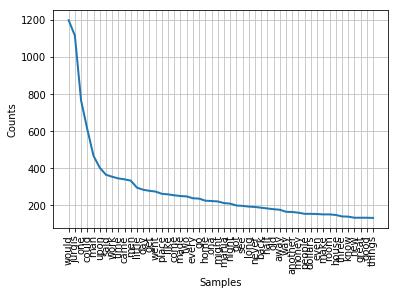

In [43]:
fdist.plot(50, cumulative=False)

#### Determining the window size 

In [44]:
# If we are interested in examining the surrounding context of a particular word in the text, we need to decide on the parameters of that context.
# If, for example, we are interested in three words that precede a particular word and three words after then we are interested in a 7-word window size.
# This window size can be established as follows:
ngrams = [words_string[i:i+7] for i in range(len(words_string)-6)]# http://digitalhistoryhacks.blogspot.com/2006/08/easy-pieces-in-python-keyword-in.html
    
kwicdict = {}           # opens up a kwicdict        
for n in ngrams: #indexes the fourth word in a sliding window of 7 (three words on each side) 
    if n[3] not in kwicdict: 
        kwicdict[n[3]] = [n]
    else:
        kwicdict[n[3]].append(n)

#### Keyword in context

In [46]:
for n in kwicdict['chicago']: # nicely formatted output for the word we are interested in determining the context for
    outstring = ' '.join(n[:3]).rjust(30) #output as a string and right justify first three words in the sliding window
    outstring += str(n[3]).center(len(n[3])+6) # output as a string and center fourth word in the sliding window
    outstring += ' '.join(n[4:]) # output as a string last three words in the sliding window of 7 consecutive words in the text
    print(outstring)

              room saloon part   chicago   known back yards.
     apply stockyards district   chicago   quarter million inhabitants
           stretches arms give   chicago   saloons slums fade
       breaking men stockyards   chicago   happened afterward stories
            second day arrival   chicago   beckoned one bosses
            friend gotten rich   chicago   party bound knew
                 knew one word   chicago   needed know least
          realize arrived said   chicago   people longer pointed
          inside anywhere else   chicago   would stood good
        clubhouse biggest club   chicago   prizefights every cockfights
              bubbly creek arm   chicago   river forms southern
        endless horrors people   chicago   saw government inspectors
          would floating labor   chicago   trained work cunning
             ago elzbieta told   chicago   billionaire paid fortune
        die starvation gutters   chicago   streets oh could
    people district politician